In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reading data from csv file
df = pd.read_csv("data_banknote_authentication.txt", sep=",", header=None)
df.rename({0:'Variance',1:'Skewness',2:'Kurtosis',3:'Entropy',4:'output'}, axis=1, inplace=True)



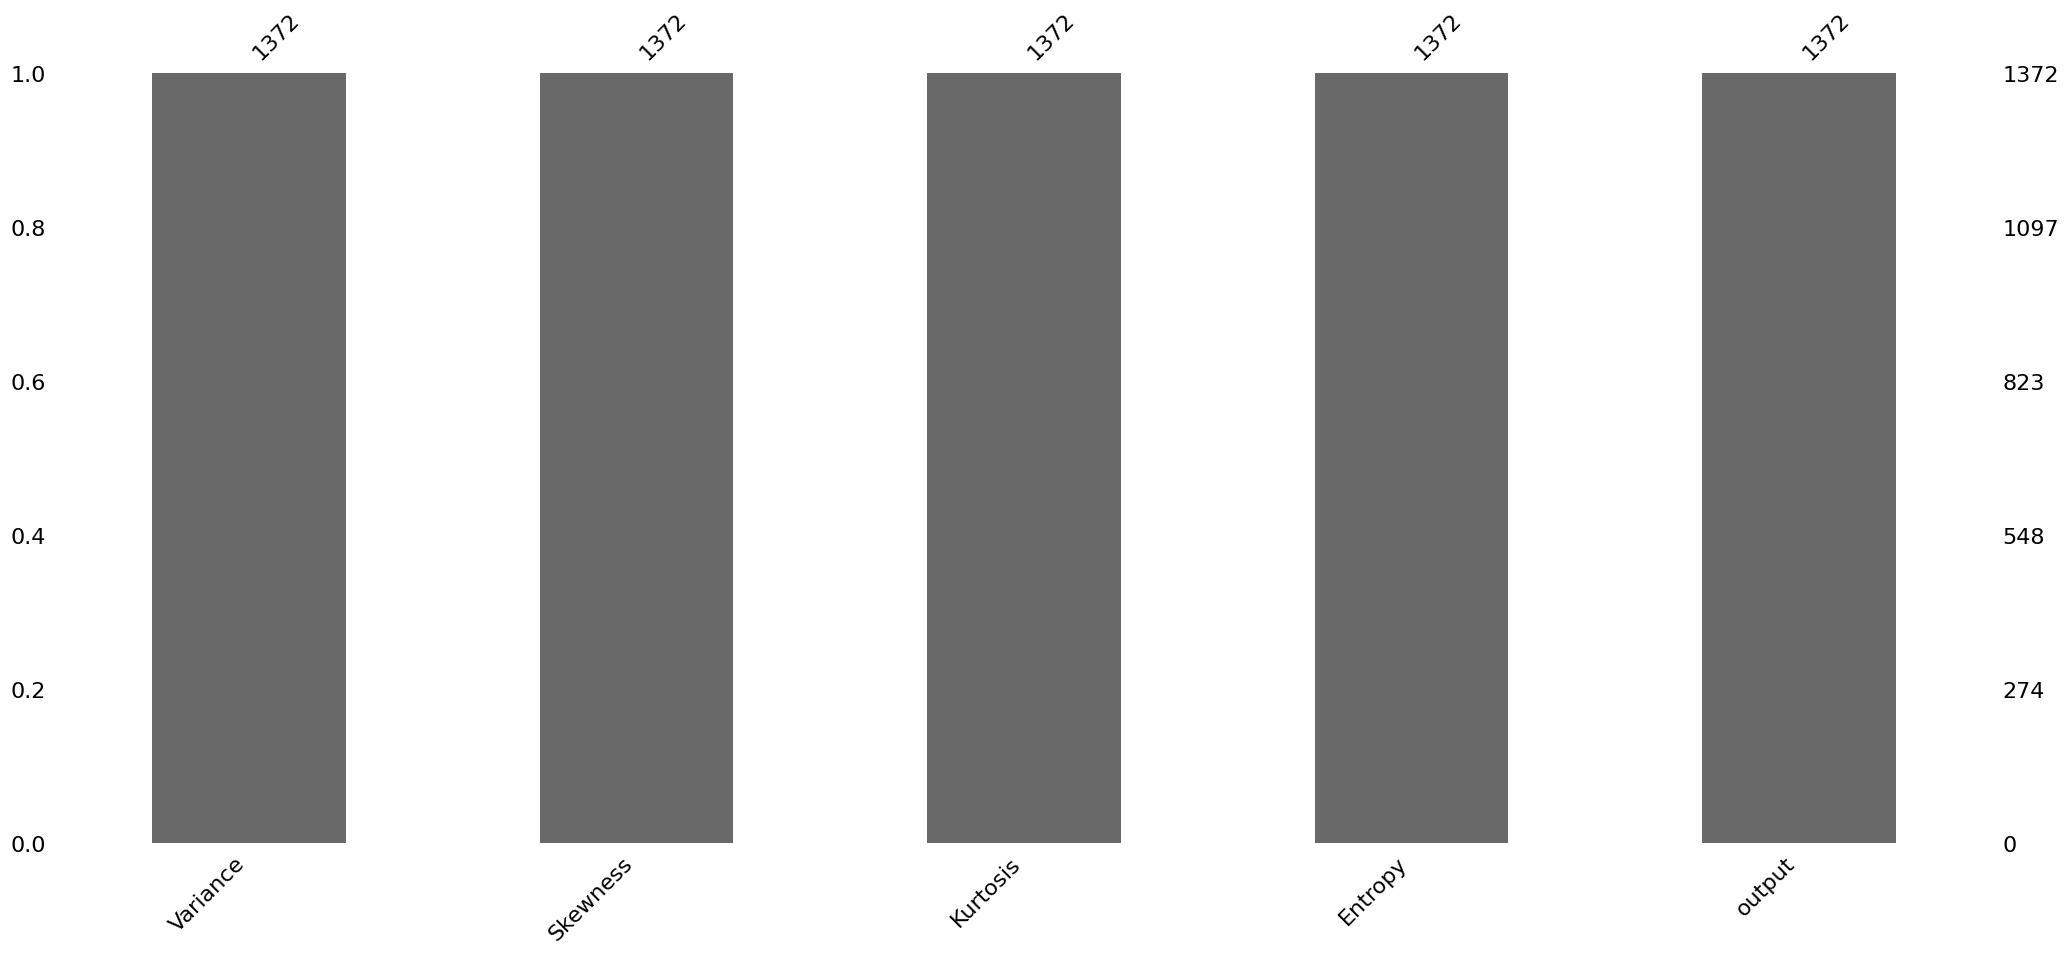

In [79]:
#checking for missing values
import missingno as msno
p=msno.bar(df)

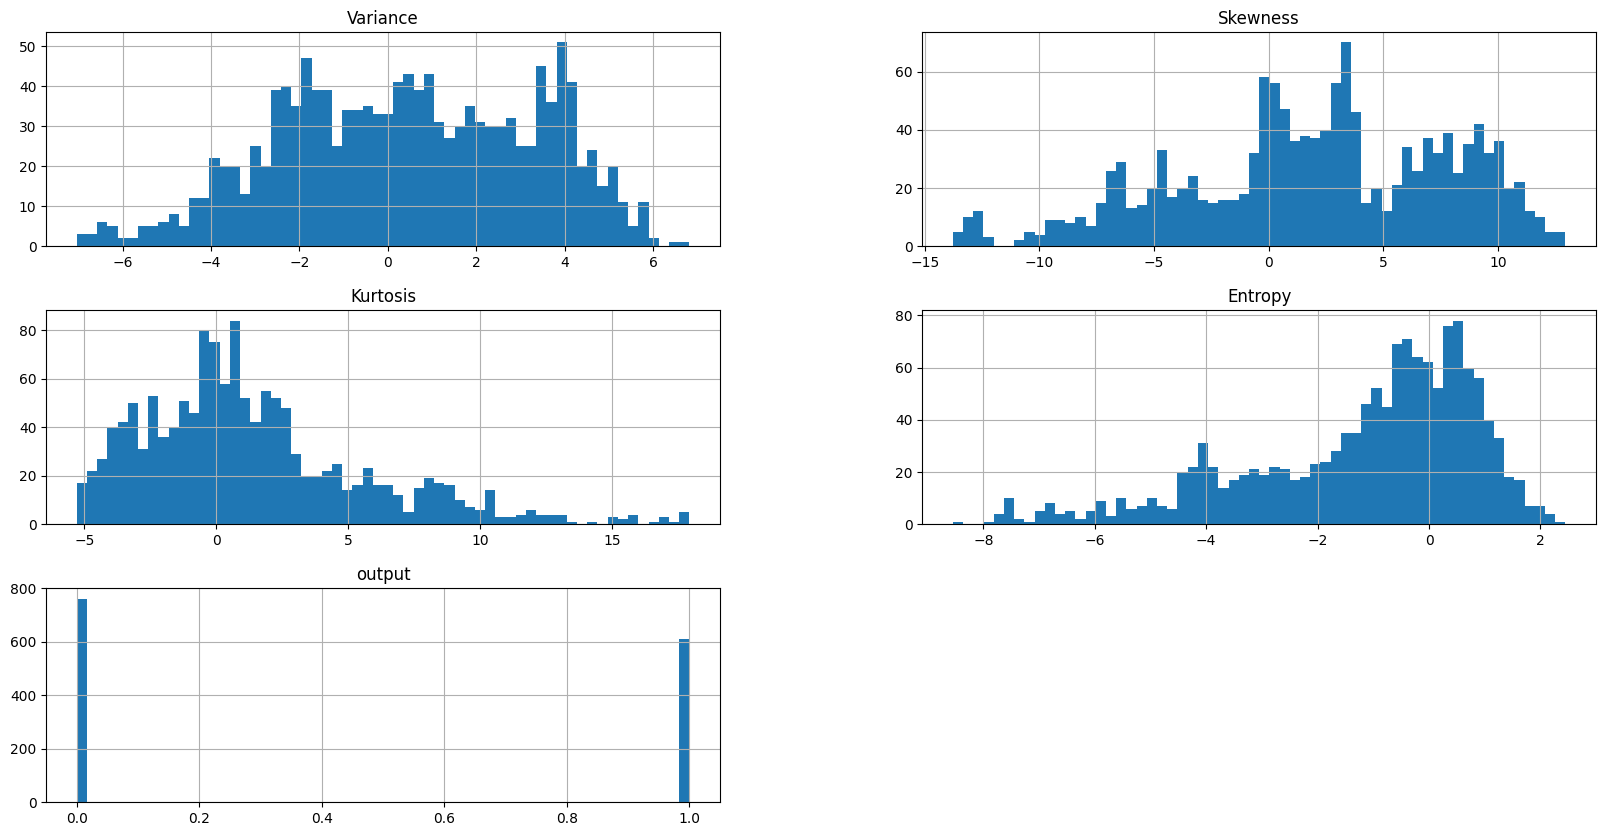

In [80]:
#checking for distribution of data and balence of data
ax = df.hist(figsize=(20,10),bins=60)
plt.show()

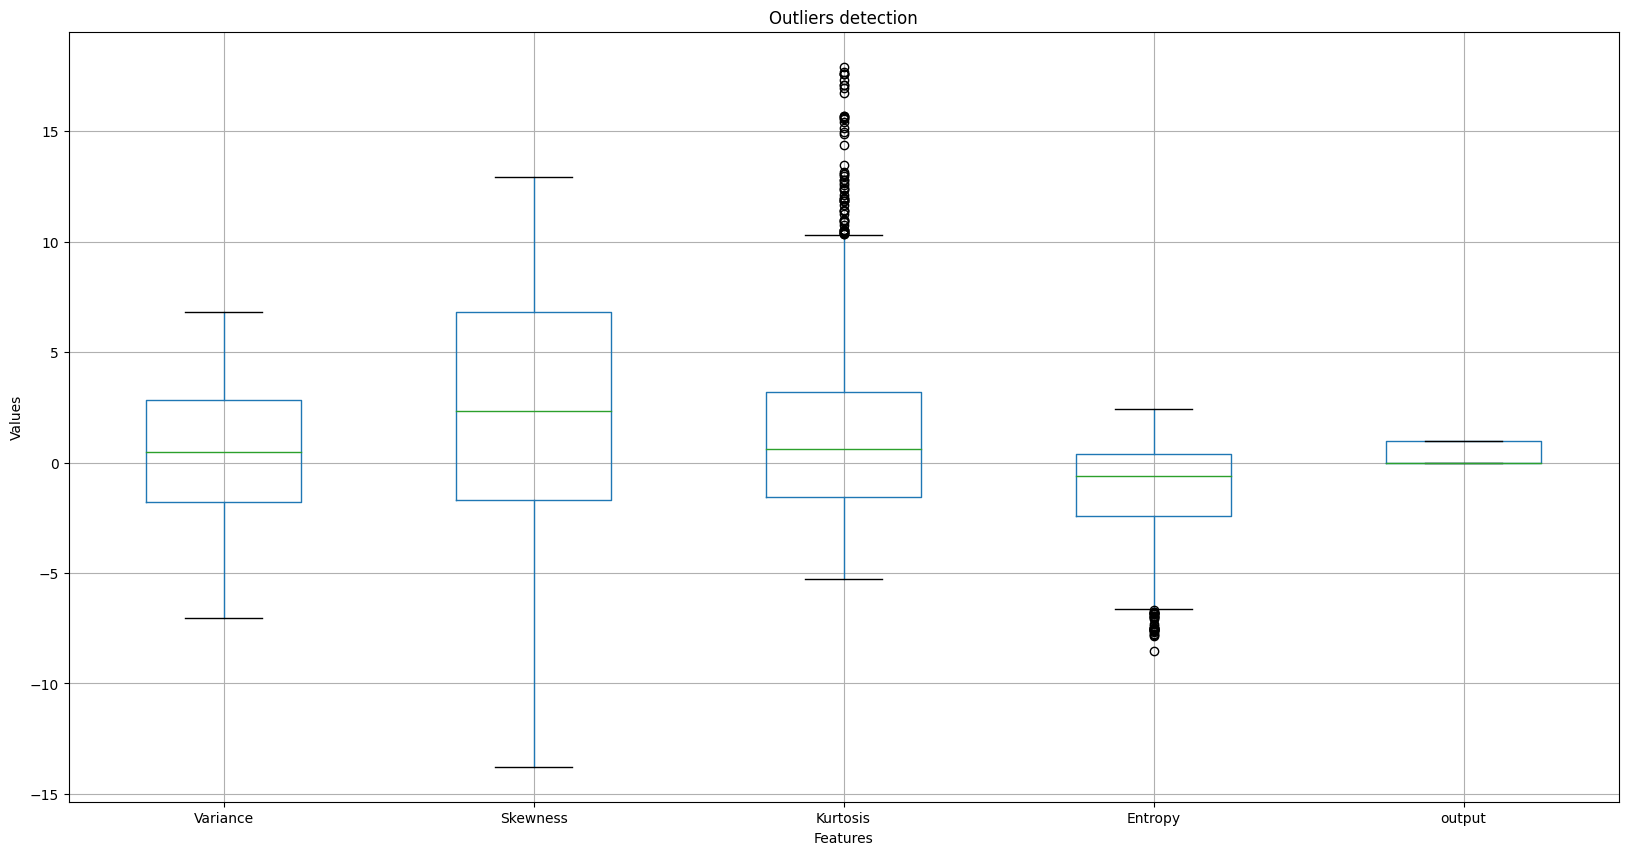

In [81]:
#checking for outliers
ax = df.boxplot(figsize=(20,10))
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Outliers detection')
plt.show()

<AxesSubplot: >

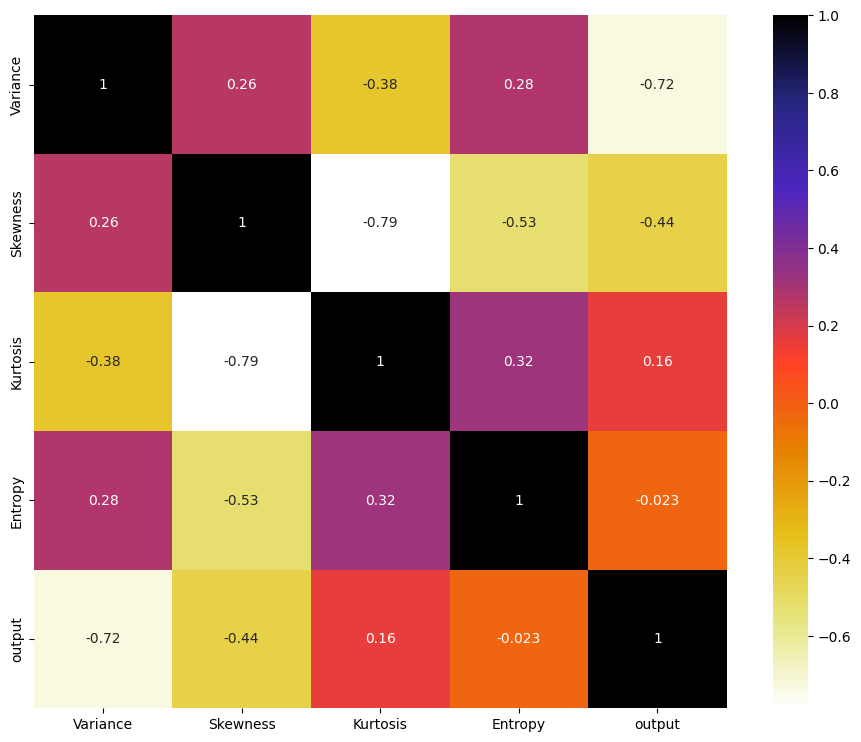

In [82]:
# checking for correlation in features
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,annot=True, square=True, cmap=plt.cm.CMRmap_r)

In [84]:
# normalizing skewed data with PowerTransform
from sklearn.preprocessing import PowerTransformer ,StandardScaler
pt = PowerTransformer(method='yeo-johnson')

Kurtosis = np.array(df['Kurtosis'])
Entropy = np.array(df['Entropy'])
reshaped_Kurtosis = np.array(Kurtosis).reshape(-1, 1)
reshaped_Entropy = np.array(Entropy).reshape(-1, 1)
df['Kurtosis'] = pt.fit_transform(reshaped_Kurtosis)
df['Entropy'] = pt.fit_transform(reshaped_Entropy)

      Variance  Skewness  Kurtosis   Entropy  output
0      3.62160   8.66610 -1.132179  0.124838       0
1      4.54590   8.16740 -0.990018 -0.381900       0
2      3.86600  -2.63830  0.332273  0.493421       0
3      3.45660   9.52280 -1.650225 -1.146542       0
4      0.32924  -4.45520  0.834721 -0.164250       0
...        ...       ...       ...       ...     ...
1367   0.40614   1.34920 -0.602479  0.060325       1
1368  -1.38870  -4.87730  1.153661  0.683946       1
1369  -3.75030 -13.45860  2.700610 -0.883825       1
1370  -3.56370  -8.38270  2.024283 -0.302272       1
1371  -2.54190  -0.65804  0.486269  1.533195       1

[1372 rows x 5 columns]


In [85]:
# Min max normalizing fetures with even distribution
df['Variance'] = (df['Variance'] - df['Variance'].min())/(df['Variance'].min()-df['Variance'].max())
df['Skewness'] = (df['Skewness'] - df['Skewness'].min())/(df['Skewness'].min()-df['Skewness'].max())

print(df)

      Variance  Skewness  Kurtosis   Entropy  output
0    -0.769004 -0.839643 -1.132179  0.124838       0
1    -0.835659 -0.820982 -0.990018 -0.381900       0
2    -0.786629 -0.416648  0.332273  0.493421       0
3    -0.757105 -0.871699 -1.650225 -1.146542       0
4    -0.531578 -0.348662  0.834721 -0.164250       0
...        ...       ...       ...       ...     ...
1367 -0.537124 -0.565855 -0.602479  0.060325       1
1368 -0.407690 -0.332868  1.153661  0.683946       1
1369 -0.237385 -0.011768  2.700610 -0.883825       1
1370 -0.250842 -0.201701  2.024283 -0.302272       1
1371 -0.324528 -0.490747  0.486269  1.533195       1

[1372 rows x 5 columns]


In [86]:
# comparing multiple models

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric

estimators = {
    'DecisionTree': DecisionTreeClassifier(),
    'Svm':SVC(kernel = 'linear', random_state = 0),
    'RandomForest': RandomForestClassifier(max_depth=2, random_state=0),
    'Knn': KNeighborsClassifier(n_neighbors=2),
    'LogisticRegression': LogisticRegression(max_iter = 1000, random_state=0)

}

# seperating features and output
X = df.iloc[:, 0:3]
y = df.iloc[:, 4]

# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)

# fitting models and checking their accuracy 
for name, estimator in estimators.items():
        print(name)
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        print(f'The accuracy score is: {metric.accuracy_score(y_test, y_pred):.4f}')
        print(f'The report is: {metric.classification_report(y_test, y_pred)}')
        print('#'*100)

DecisionTree
The accuracy score is: 0.9854
The report is:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       0.99      0.97      0.98       145

    accuracy                           0.99       343
   macro avg       0.99      0.98      0.99       343
weighted avg       0.99      0.99      0.99       343

####################################################################################################
Svm
The accuracy score is: 0.9708
The report is:               precision    recall  f1-score   support

           0       1.00      0.95      0.97       198
           1       0.94      1.00      0.97       145

    accuracy                           0.97       343
   macro avg       0.97      0.97      0.97       343
weighted avg       0.97      0.97      0.97       343

####################################################################################################
RandomForest
The accuracy score is: 0

In [87]:
# grid sirching descision tree for increase accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_param = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}


dtree = DecisionTreeClassifier()
clf = GridSearchCV(dtree, tree_param)
clf.fit(X_train,y_train)
# print(clf.cv_results_)
y_pred = clf.predict(X_test)
print(f'The accuracy score is: {metric.accuracy_score(y_test, y_pred):.4f}')
print(f'The report is: {metric.classification_report(y_test, y_pred)}')

The accuracy score is: 0.9942
The report is:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       0.99      0.99      0.99       145

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [88]:
# grid sirching support vector machine for increase accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_svm = {'kernel': ('linear', 'rbf','poly', 'sigmoid'), 'C':[0.1,1,1.5, 10,100],'gamma': [1, 0.1, 0.01, 0.001, 0.0001,1e-7, 1e-4]}

SVM_classifier = SVC()
clf = GridSearchCV(SVM_classifier, param_svm)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f'The accuracy score is: {metric.accuracy_score(y_test, y_pred):.4f}')
print(f'The report is: {metric.classification_report(y_test, y_pred)}')


The accuracy score is: 0.9971
The report is:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       198
           1       0.99      1.00      1.00       145

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [89]:
# Printing the optimal parameters found by grid search
clf.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}